## <h1><b><center>**Regression Model**</center></b></h1>

# **Importing Libraries**

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data**

In [32]:
df = pd.read_csv('combined_cycle_power_plant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# **Algorithm Training**


# **Interrelation**

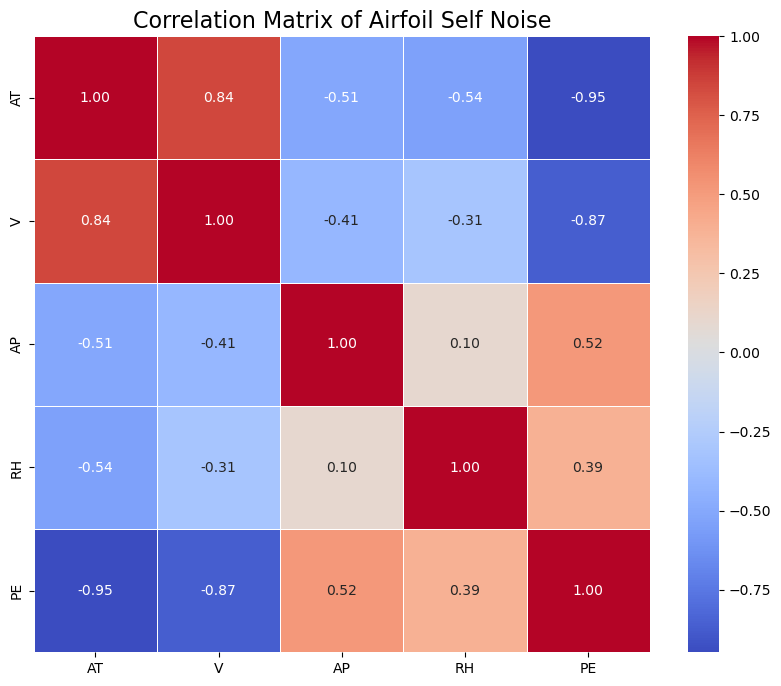

In [14]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)
plt.title("Correlation Matrix of Airfoil Self Noise", fontsize=16)
output_path = r'C:\Users\ambat\OneDrive\Documents\plots\regression.png'
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


# **Data Preparation**

In [15]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# **The goal of this model is to predict PE.**

In [16]:
X = df.drop(columns=['PE'])
y = df['PE']  
X.head()


,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R^2:', model.score(X_train, y_train))

intercept: 447.9408728368464
slope: [-1.96834905 -0.23367459  0.06841551 -0.15715464]
R^2: 0.9293961511829775


In [19]:
yhat = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, yhat))

RMSE: 21.03267040358117


In [20]:
X['AT'] = np.square(df.AT)
X['V'] = np.square(df.V)
X['AP'] = np.square(df.AP)
X['RH'] = np.square(df.RH)
X.head()

,AT,V,AP,RH
0,69.5556,1662.1929,1.021798e+06,8101.8001
1,558.8496,3421.0801,1.022930e+06,5505.6400
2,884.4676,3237.6100,1.014351e+06,1756.4481
3,363.6649,2469.0961,1.014492e+06,5896.7041
4,139.2400,1653.2356,1.034553e+06,9447.8400


In [21]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)


print('R squared:', model.score(X,y))
print('RMSE', mean_squared_error(y_test, yhat))

R squared: 0.8750261020523925
RMSE 35.87085883146422
